In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv' ,sep = ';')

In [7]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df.corr()['quality'].drop('quality').sort_values(ascending = False)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [222]:
# df = df[df['quality'] !=3]
# df = df[df['quality'] !=8]
# df = df[df['quality'] !=4]

In [9]:
df['quality'].nunique()

6

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

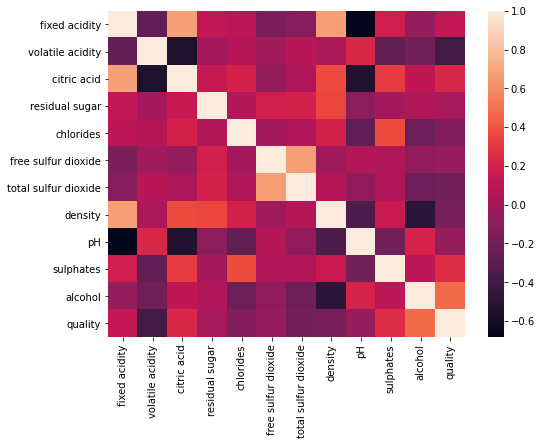

In [13]:
# Heat map of correlation of all continuous features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [14]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


<AxesSubplot:xlabel='quality', ylabel='count'>

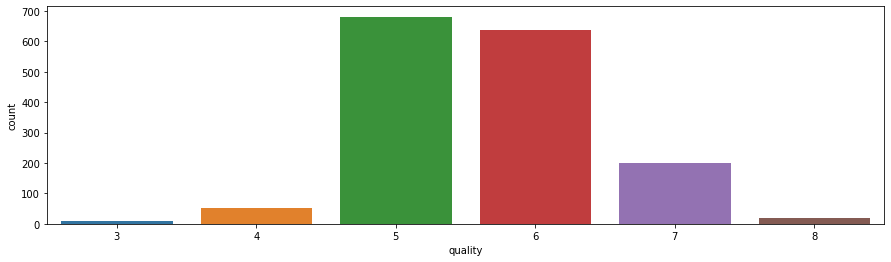

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(x='quality' ,data = df)

In [16]:
X = df.drop(['residual sugar' ,'quality'] , axis=1)
y = df['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
y_train

925     7
363     5
906     5
426     6
1251    5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1119, dtype: int64

In [20]:
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [21]:
df['quality'].nunique()

6

In [22]:
from keras.utils import to_categorical

In [23]:
y = to_categorical(y)

In [24]:
y.shape

(1599, 9)

In [25]:
y.shape

(1599, 9)

In [26]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [27]:
y_train.shape

(1119,)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scalar = StandardScaler()

In [30]:
y_test.shape

(480,)

In [31]:
X_train = scalar.fit_transform(X_train)

In [32]:
X_test = scalar.transform(X_test)

In [33]:
model = Sequential()

model.add(Dense(128 ,input_dim =10,activation ='relu'))
model.add(Dense(512 ,input_dim =10,activation ='relu'))
model.add(Dense(8 ,input_dim =10,activation ='relu'))
model.add(Dense(7 ,activation='softmax'))
          
model.compile(loss='categorical_crossentropy' ,optimizer='rmsprop' ,metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 4104      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 63        
Total params: 71,623
Trainable params: 71,623
Non-trainable params: 0
_________________________________________________________________


In [35]:
len(df)

1599

In [36]:
es = EarlyStopping(monitor='val_loss' ,patience=1)

In [37]:
X_test

array([[-0.35581722,  0.14767337, -0.97362431, ..., -0.48256207,
         0.00685171, -0.77159838],
       [-0.29744462, -0.18210512, -0.51304042, ...,  0.49202635,
        -1.03865693, -0.86600234],
       [ 1.39536061,  0.75226727, -0.25716048, ..., -0.22267183,
         1.86553373, -0.48838651],
       ...,
       [-0.93954316, -0.40195744, -0.15480851, ...,  0.49202635,
        -0.34165117,  0.17244119],
       [ 1.27861542, -0.12714203,  1.892231  , ..., -1.4571505 ,
         0.00685171,  1.30528867],
       [ 0.92837985, -0.18210512, -0.15480851, ...,  0.16716354,
        -0.80632167, -0.39398255]])

In [ ]:
model.fit(X_train ,y_train ,validation_data=(X_test,y_test) ,callbacks=[es] ,epochs=150 ,batch_size=256 ,verbose = 1)

In [342]:
predictions = model.predict_classes(X_test)

In [343]:
from sklearn.metrics import classification_report ,confusion_matrix

In [344]:
len(predictions)

396

In [345]:
len(y_test.argmax(axis=1))

396

In [346]:
# I'm getting an accuracy of 70%, which can be improved by some grid validation.
print(classification_report(y_test.argmax(axis=1) ,predictions))

              precision    recall  f1-score   support

           5       0.80      0.42      0.56       200
           6       0.60      0.89      0.72       196

    accuracy                           0.66       396
   macro avg       0.70      0.66      0.64       396
weighted avg       0.70      0.66      0.64       396

